In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
df_train = pd.read_excel('C:/Users/aksin52/Documents/Webinar_Customer_Segmentation/train.xlsx')
df_test  = pd.read_excel('C:/Users/aksin52/Documents/Webinar_Customer_Segmentation/test.xlsx')
df_combined = pd.concat([df_train, df_test])

C:\Anaconda_Python\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_train.isnull().sum()

ID                                         0
Gender                                     0
DOB                                       15
Lead_Creation_Date                         0
City_Code                                814
City_Category                            814
Employer_Code                           4018
Employer_Category1                      4018
Employer_Category2                      4298
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9391
Primary_Bank_Type                       9391
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27709
Loan_Period                            27709
Interest_Rate                          47437
EMI                                    47437
Var1                                       0
Approved                                   0
loan_amt_c

399

In [ ]:
df_combined.describe(include='all')

,Approved,City_Category,City_Code,Contacted,Customer_Existing_Primary_Bank_Code,DOB,EMI,Employer_Category1,Employer_Category2,Employer_Code,...,Interest_Rate,Lead_Creation_Date,Loan_Amount,Loan_Period,Monthly_Income,Primary_Bank_Type,Source,Source_Category,Var1,loan_amt_cl
count,69713.000000,98622,98622,99750,86322,99732,31928.000000,94127,93757.000000,94127,...,31928.000000,99750,60170.000000,60170.000000,9.975000e+04,86322,99750,99750,99750.000000,69713.000000
unique,NaN,3,704,2,57,11672,NaN,3,NaN,48281,...,NaN,92,NaN,NaN,NaN,2,33,7,NaN,NaN
top,NaN,A,C10001,Y,B001,1982-01-11 00:00:00,NaN,A,NaN,COM0000002,...,NaN,2016-09-02 00:00:00,NaN,NaN,NaN,P,S122,B,NaN,NaN
freq,NaN,71383,14313,64772,20155,345,NaN,47805,NaN,622,...,NaN,2614,NaN,NaN,NaN,56483,44213,42743,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,1930-07-24 00:00:00,NaN,NaN,NaN,NaN,...,NaN,2016-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,1999-02-24 00:00:00,NaN,NaN,NaN,NaN,...,NaN,2016-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.014631,NaN,NaN,NaN,NaN,NaN,1099.485718,NaN,3.722623,NaN,...,19.233814,NaN,39445.986372,3.894399,5.126893e+03,NaN,NaN,NaN,3.952622,23757.649219
std,0.120073,NaN,NaN,NaN,NaN,NaN,745.125218,NaN,0.803623,NaN,...,5.857761,NaN,30667.188339,1.162487,1.466628e+05,NaN,NaN,NaN,3.819744,30679.558166
min,0.000000,NaN,NaN,NaN,NaN,NaN,118.000000,NaN,1.000000,NaN,...,11.990000,NaN,5000.000000,1.000000,0.000000e+00,NaN,NaN,NaN,0.000000,0.000000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,642.750000,NaN,4.000000,NaN,...,15.250000,NaN,20000.000000,3.000000,1.650000e+03,NaN,NaN,NaN,0.000000,0.000000


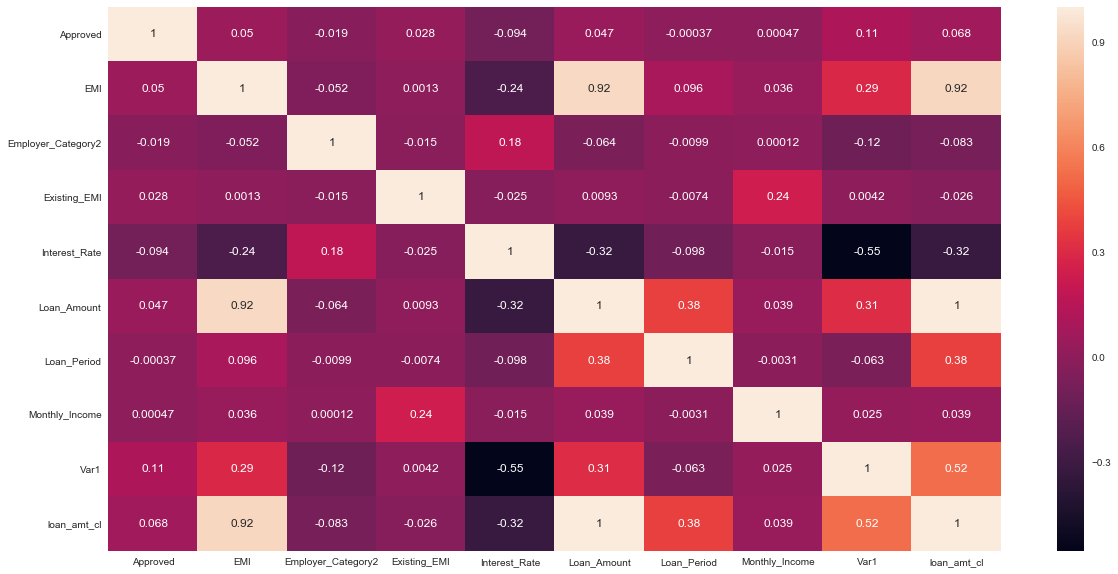

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_combined.corr(), annot=True)
plt.show()

In [ ]:
(np.sum(df_combined.isnull())/df_combined.shape[0]).sort_values(ascending=True)*100

Gender                                  0.000000
Lead_Creation_Date                      0.000000
Source                                  0.000000
ID                                      0.000000
Var1                                    0.000000
Source_Category                         0.000000
Monthly_Income                          0.000000
Contacted                               0.000000
DOB                                     0.018045
Existing_EMI                            0.083208
City_Code                               1.130827
City_Category                           1.130827
Employer_Category1                      5.637093
Employer_Code                           5.637093
Employer_Category2                      6.008020
Primary_Bank_Type                      13.461654
Customer_Existing_Primary_Bank_Code    13.461654
Approved                               30.112281
loan_amt_cl                            30.112281
Loan_Amount                            39.679198
Loan_Period         

In [ ]:
# Relationship between City Category and City Code
print (np.sum(df_combined.isnull()).loc['City_Category'] == df_combined[df_combined.City_Category.isnull() & df_combined.City_Code.isnull()].shape[0])

# Relationship between Employer Category1 and Employer Code
print (np.sum(df_combined.isnull()).loc['Employer_Code'] == df_combined[df_combined.Employer_Category1.isnull() & df_combined.Employer_Code.isnull()].shape[0])

# Relationship between Loan Amount and Loan_Period
print (np.sum(df_combined.isnull()).loc['Loan_Amount'] == df_combined[df_combined.Loan_Amount.isnull() & df_combined.Loan_Period.isnull()].shape[0])

# Relationship between Interest Rate and EMI
print (np.sum(df_combined.isnull()).loc['EMI'] == df_combined[df_combined.EMI.isnull() & df_combined.Interest_Rate.isnull()].shape[0])

# Relationship between Customer Existing Primary Bank Code and Primary Bank Type
print (np.sum(df_combined.isnull()).loc['Primary_Bank_Type'] == df_combined[df_combined.Customer_Existing_Primary_Bank_Code.isnull() & df_combined.Primary_Bank_Type.isnull()].shape[0])

True
True
True
True
True


In [ ]:
# Group by source_category
df_combined.groupby('Source_Category').size()

Source_Category
A        6
B    42743
C    16274
D      717
E     1478
F      629
G    37903
dtype: int64

In [ ]:

tab = df_combined.groupby('Source_Category').Approved.mean().sort_values()*100
print("percent of Approved=1, by", tab)
# conclusion: source_category D and A never converted into leads in our training set

percent of Approved=1, by Source_Category
A    0.000000
D    0.000000
C    1.230877
F    1.307190
G    1.372653
E    1.428571
B    1.660405
Name: Approved, dtype: float64


In [ ]:
# create age 
df_combined['age'] = 2018 - df_combined.DOB.dt.year
df_combined['age']=np.where(df_combined['age'] <0, 'nan', df_combined['age'])
df_combined.head()

,Approved,City_Category,City_Code,Contacted,Customer_Existing_Primary_Bank_Code,DOB,EMI,Employer_Category1,Employer_Category2,Employer_Code,...,Lead_Creation_Date,Loan_Amount,Loan_Period,Monthly_Income,Primary_Bank_Type,Source,Source_Category,Var1,loan_amt_cl,age
0,0.0,A,C10001,N,B001,1979-07-23,NaN,A,4.0,COM0044082,...,2016-07-15,NaN,NaN,2000.0,P,S122,G,0,0.0,39.0
1,0.0,A,C10003,Y,B002,1986-12-07,953.0,C,1.0,COM0000002,...,2016-07-04,20000.0,2.0,3500.0,P,S122,G,10,20000.0,32.0
2,0.0,C,C10125,Y,B003,1982-12-10,NaN,C,4.0,COM0005267,...,2016-07-19,45000.0,4.0,2250.0,G,S143,B,0,45000.0,36.0
3,0.0,C,C10477,Y,B003,1989-01-30,NaN,A,4.0,COM0004143,...,2016-07-09,92000.0,5.0,3500.0,G,S143,B,7,92000.0,29.0
4,0.0,A,C10002,Y,B001,1985-04-19,NaN,A,4.0,COM0001781,...,2016-07-20,50000.0,2.0,10000.0,P,S134,B,10,50000.0,33.0


In [ ]:
df_drop_dep=df_combined.drop(['Approved'], axis=1)
df_drop_dep.fillna(df_drop_dep.mean(), inplace=True)

In [ ]:
dep=['Approved']
col_num= ['Monthly_Income','Existing_EMI','Loan_Amount','Loan_Period','Interest_Rate','EMI','Var1','loan_amt_cl']
col_char=['Gender','Source_Category','Contacted','Primary_Bank_Type','Employer_Category1','Employer_Category2','City_Category']

In [ ]:
X_char_dum = pd.get_dummies(df_drop_dep[col_char], drop_first = True)

In [ ]:
X_all=pd.concat([df_drop_dep[col_num],X_char_dum],axis=1, join='inner')

In [ ]:
# rows 
Xm=X_all.head(69713)
Xp=X_all.tail(30050)
ym=df_train['Approved']

In [ ]:
Xm.to_excel(r'C:\Users\aksin52\Documents\Webinar_Customer_Segmentation\Xm.xlsx')
 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(Xm, ym, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=5, min_samples_leaf=5)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [ ]:
y_pred = logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[20630     5]
 [  278     1]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     20635
          1       0.00      0.00      0.00       279

avg / total       0.97      0.99      0.98     20914



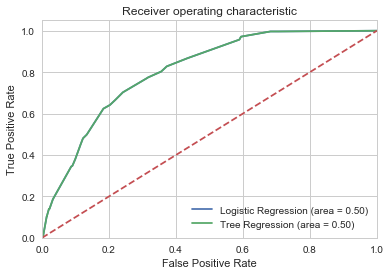

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
tree_roc_auc=roc_auc_score(y_test, dtree.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label='Tree Regression (area = %0.2f)' % tree_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Predictions from the models

In [ ]:
y_pred = logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)